# Lab 9: Decision Trees and Random Forests
Objective: Learn Decision Trees, ID3, CART, and Random Forest, and apply them to real-world data

## Task 1: ID3 Decision Tree Implementation from Scratch on XOR dataset

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Entropy function
def entropy(y):
    #return NotImplementedError

# Split dataset based on feature values
def split_dataset(X, y, feature, value):
    #return NotImplementedError

# Information Gain calculation
def information_gain(X, y, feature):
    return NotImplementedError

# ID3 Algorithm
def id3(X, y, feature_names):
    return NotImplementedError

# Build logic gate datasets
def create_logic_gate_dataset(gate):
    if gate == "XOR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 0])
    return X, y

# Prediction function
def predict(tree, sample, feature_names):
    return NotImplementedError

<class 'NotImplementedError'>

Predictions:
Input: [0 0], Prediction: <class 'NotImplementedError'>
Input: [0 1], Prediction: <class 'NotImplementedError'>
Input: [1 0], Prediction: <class 'NotImplementedError'>
Input: [1 1], Prediction: <class 'NotImplementedError'>


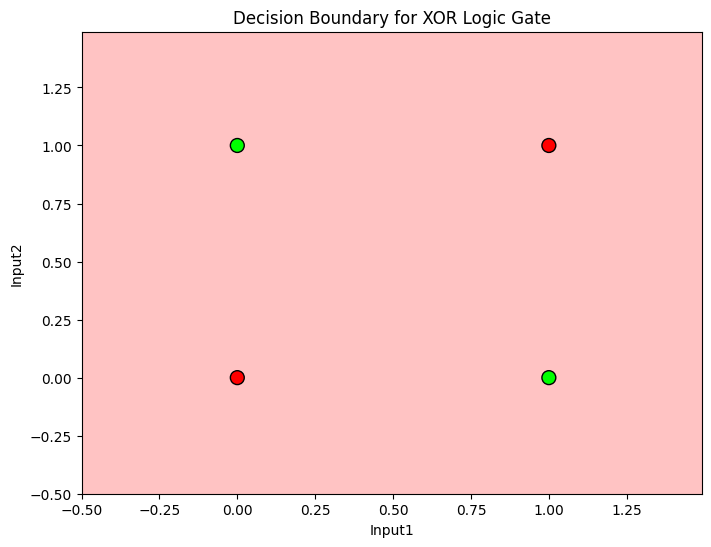

In [9]:
# Testing and visualizing for XOR gate

X, y = create_logic_gate_dataset("XOR")
feature_names = ['Input1', 'Input2']

# Build and print the decision tree
tree = id3(X, y, feature_names)
print(tree)

# Make predictions
print("\nPredictions:")
samples = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for sample in samples:
      prediction = predict(tree, sample, feature_names)
      print(f"Input: {sample}, Prediction: {prediction}")


# Visualization function for decision boundaries with error handling
def plot_decision_boundary(tree, feature_names, gate):
    # Create a grid of points to plot
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict for each point in the grid with error handling
    Z = []
    for sample in grid:
        prediction = predict(tree, sample, feature_names)
        # Ensure the prediction is a valid integer (0 or 1); default to 0 if not
        Z.append(prediction if isinstance(prediction, int) else 0)
    Z = np.array(Z).reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)

    # Plot the original data points for the logic gate
    X, y = create_logic_gate_dataset(gate)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']), edgecolor='k', s=100)
    plt.xlabel("Input1")
    plt.ylabel("Input2")
    plt.title(f"Decision Boundary for {gate} Logic Gate")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


    # Visualize decision boundaries
plot_decision_boundary(tree, feature_names, "XOR")

# Task 2: CART Decision Tree on moons dataset

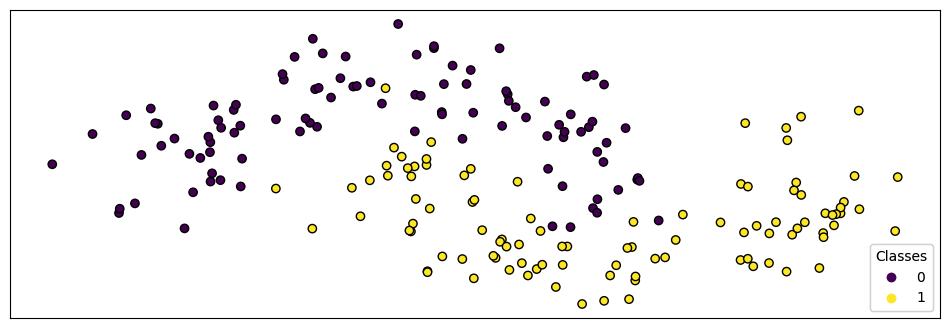

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.figure(figsize=(12,4))
ax = plt.gca()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)
ax.set_xticks(())
ax.set_yticks(());

CART Tree from scratch

In [ ]:
# Gini impurity calculation
def gini(y):
    return NotImplementedError

# Information gain using Gini impurity
def gini_gain(X_column, y, threshold):
    return NotImplementedError

# CART Decision Tree class
class CARTTree:
    def __init__(self, max_depth=10, max_features=None):
        self.max_depth = max_depth
        self.tree = None
        self.max_features = max_features


    def fit(self, X, y):

    def _grow_tree(self, X, y, depth=0):
        return NotImplementedError


    def _predict(self, x, tree):
        return NotImplementedError

    def predict(self, X):
        return NotImplementedError

In [10]:
# Train the CART Decision Tree on make_moons data
cart_tree = CARTTree()
cart_tree.fit(X, y)

# Predict on training data
predictions = cart_tree.predict(X)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print("CART Decision Tree Accuracy on make_moons:", accuracy)

# Visualization of decision boundaries
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of CART Decision Tree")
    plt.show()

# Plot decision boundary
plot_decision_boundary(cart_tree, X, y)

NameError: name 'CARTTree' is not defined

# Task 3: Performance comparison of Decision Tree with Random Forest on Breast Cancer dataset

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1]:
# Train the CART Decision Tree on make_moons data
cart_tree = CARTTree()
cart_tree.fit(X_train, y_train)

# Predict on training data
predictions = cart_tree.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("CART Decision Tree Accuracy on Breast Cancer Dataset:", accuracy)

NameError: name 'CARTTree' is not defined

Random Forest Implementation from Scratch

In [ ]:
# Random Forest class
class RandomForest:
    def __init__(self, num_trees=10, max_depth=10, max_features=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = 
        idxs =
        return X[idxs], y[idxs]

    def fit(self, X, y):

    def _predict_tree(self, x):
        # Aggregate predictions from all trees
        # Majority vote
        return NotImplementedError

    def predict(self, X):
        return NotImplementedError

In [2]:
# Train the Random Forest on breast cancer dataset
random_forest = RandomForest()
random_forest.fit(X_train, y_train)

# Predict on the test set
rf_predictions = random_forest.predict(X_test)

# Calculate accuracy
accuracy = np.mean(rf_predictions == y_test)
print("Random Forest Accuracy on Breast Cancer Dataset:", accuracy)


NameError: name 'RandomForest' is not defined